## Principal Component Analysis $($PCA$)$

PCA is a well-known dimensionality reduction technique that is actually based on the concept of representing your data in a new co-ordinate system - i.e. by identifying a new set of basis vectors through eigendecomposition/spectral decomposition of the data covariance matrix. In this example we are going to look at how PCA can be used to obtain a compressed representation of your data through this simple coordinate transformation. The data set we will use for this purpose is a collection of point sets that represent the outline/shape of hands (stored in a folder called hand_points). The data set contains 18 sets of 2D points where each 2D point set represents the shape of a hand. Each point set is made up of 72 individual landmarks defining the boundary of the hand. This is visualised below.

In [4]:
import numpy as np
import os
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [5]:
root_dir = './Hand/'
files = os.listdir(root_dir)


shapes=[]
for i, f in enumerate(files):
  # Load .pts file
  file_path = root_dir + f
  with open(file_path, 'r') as file:
      lines = file.readlines()

  # Process the lines into data points
  data = []
  i=0
  for line in lines:
    if i>0:
      # Assuming the file contains whitespace-separated numerical data
      line_data = [float(num) for num in line.split()]
      data.append(line_data)
    i+=1
  shape = np.asarray(data)
  shape[:,1] = -shape[:,1]
  shapes.append(shape)

orig_shape = shape.shape
## Now 'shapes' is a list that contains all the 2D hand shapes in the data set

We can plot individual shapes in the appended list and visualise them as below.

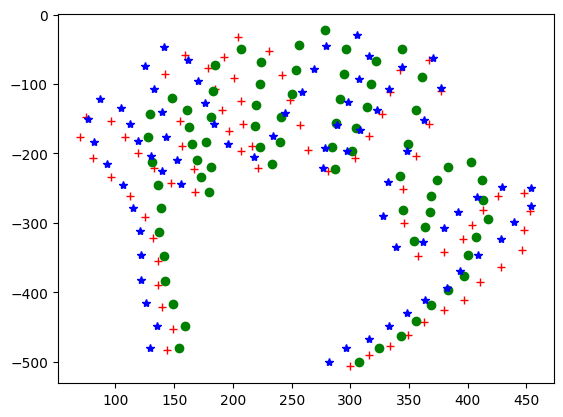

In [6]:
shape = shapes[0]
plt.plot(shape[:,0],shape[:,1],'r+')
shape = shapes[1]
plt.plot(shape[:,0],shape[:,1],'go')
shape = shapes[2]
plt.plot(shape[:,0],shape[:,1],'b*')

Now, in this example we are interested in applying PCA to the entire data set of 18 shapes. This enables identification of 'principal components' or 'eigenvectors' that define the main directions of variability in shape across the full data set (or population) of 18 shapes. In order to do this, we first adopt a vectorial representation of each shape. This is done by reshaping the $N\times2$ sized array representing each shape into an $N*2 \times 1$ sized vector, and creating a data array that contains each shape vector as a row. This is process is shown below.

(18, 144)


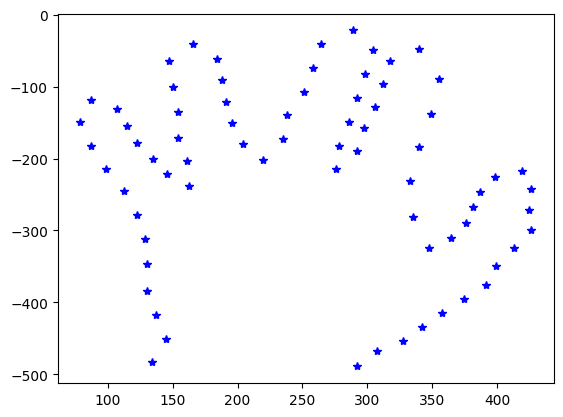

In [7]:
shape_array=[]
for i, s in enumerate(shapes):
  shape_vec = np.reshape(s,(-1))
  shape_vec = np.expand_dims(shape_vec,axis=0)
  if i==0:
    shape_array = shape_vec
  else:
    shape_array = np.vstack((shape_array,shape_vec))

## shape_array now contains all our 18 hand shapes as 18 column vectors in the array. You can verify this by printing the array shape, extracting one vector and reshaping and plotting it as below.
print(shape_array.shape)
tmp = shape_array[7,:]
shape = np.reshape(tmp,orig_shape)
plt.plot(shape[:,0],shape[:,1],'b*')


Now that we have our shape data array we can perform PCA on it to extract principal components/eigenvectors (which define our new coordinate system) and additionally, estimate the coordinates for each shape in this new coordinate system. It is exactly this process that leads to a significant reduction in dimensionality of the data or in other words, to 'data compression'. Lets take a look at this process. For simplicity in visualisation/interpretation, we are going to choose just 2 of the most important principal components/eigenvectors to represent our new coordinate system.

In [18]:
pca = PCA(n_components=2)
pca.fit(shape_array)
new_shape_array = pca.transform(shape_array)

print("Original shape array size = ", shape_array.shape)
print("New shape array size = ", new_shape_array.shape)

What this shows you is that the original shapes in the shape array which were 144-dimensional vectors, have now each been represented as a much smaller 2-dimensional vector in the new PCA-derived coordinate system, where the coordinate basis is spanned by the estimated 'principal components/eigenvectors'. This means that we can also visualse each of the 18 shapes in this new coordinate space where, each shape is represented by a single 2D point as shown below. Here each '+' represents a shape in this new coordinate space or "PCA space" as its otherwise known.

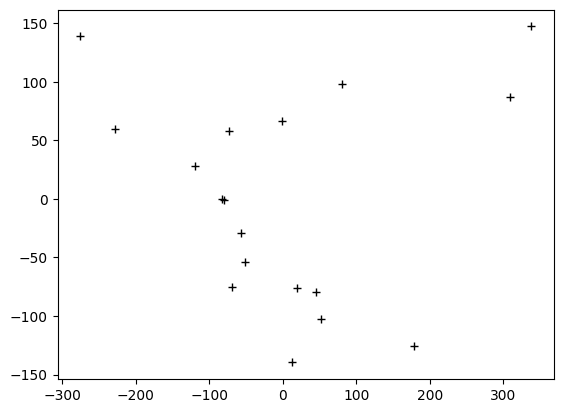

In [10]:
plt.plot(new_shape_array[:,0],new_shape_array[:,1], 'k+')

We can also quite easily recover the shape in its original coordinate space from its representation in the PCA space and compare the original shape with the reconstruction. It is important to note that PCA results in $\textbf{lossy} $ compression and reconstruction of data. Meaning that its likely some information is lost when the data is compressed and represented in the new coordinate space with reduced dimensions. The amount of information lost is also dependent on the number of principal components/eigenvectors retained to define the new coordinate space. More eigenvectors = less loss of information. In the example above we kept only the two most important principal components/eigenvectors resulting in a significant reduction of dimensionality of the data. Lets take a look at how much of the original shape information was lost. Note: Importance of eigenvectors is ranked according to how much of the variance in the original data is explained by each eigenvector. In other words, higher the eigenvalue, more important is the corresponding eigenvector. Therefore, by just sorting the eigenvalues in descending order, it is possible to sort the corresponding eigenvectors in descending order of their importance. This is automatically done for you by scikit-learn's implementation of the PCA algorithm.

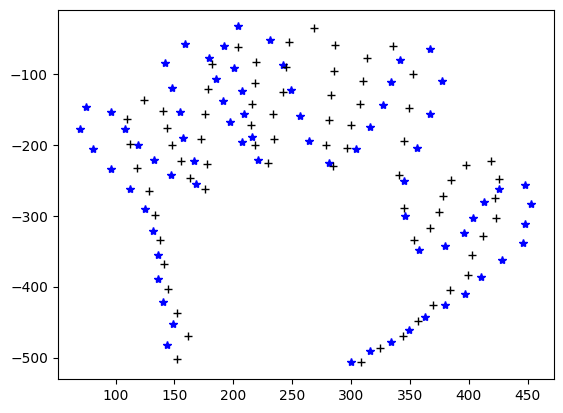

In [17]:
# Lets take a look at the first shape in our shape array
# Plotting the original shape
tmp = shape_array[0,:]
shape = np.reshape(tmp,orig_shape)
plt.plot(shape[:,0],shape[:,1],'b*')

# Now lets reconstruct the first shape from its new-corrdinate system given by the principal components/eigenvectors
recon_vec = pca.inverse_transform(new_shape_array[0, ::-1])
recon_shape = np.reshape(recon_vec,orig_shape)
plt.plot(recon_shape[:,0],recon_shape[:,1],'k+')


From this what you can see is that although the shape of a hand is preserved, due to the lossy compression from PCA, not all of the same shape information is preserved. Hence there is noticeable differences between the original hand shape and the reconstructed shape when just two principal components/eigenvectors are used.